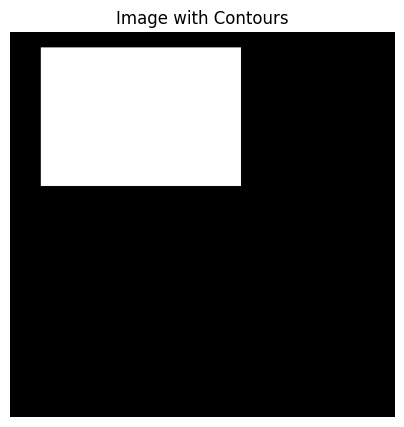

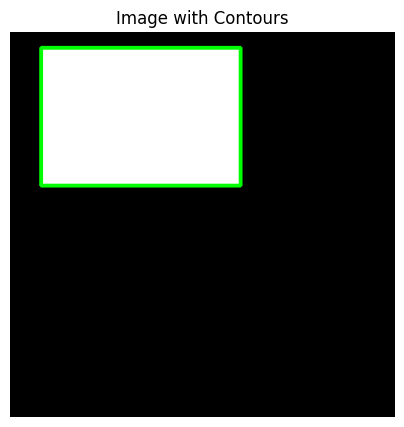

In [40]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from IPython.display import FileLink

#path = 'imageSource/white.jpg'




image = np.zeros([500, 500, 3], dtype = np.uint8) 
image[20:200, 40:300] = 255
plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.title('Image with Contours')
plt.axis('off')  # Hide axes
plt.show()
#image = cv.imread(path)

assert image is not None, "file could not be read, check with os.path.exists()"

# Convert image to grayscale
imgray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Apply thresholding
ret, thresh = cv.threshold(imgray, 127, 255, 0)
#thresh = ( imgray > 0).astype(np.uint8)



# Check OpenCV version and handle findContours output accordingly
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image (or a copy of it)
image_with_contours = image.copy()
cv.drawContours(image_with_contours, contours, -1, (0, 255, 0), 3)

# Convert BGR image to RGB for displaying with matplotlib
image_with_contours_rgb = cv.cvtColor(image_with_contours, cv.COLOR_BGR2RGB)

# Display the image with contours using matplotlib
plt.figure(figsize=(5, 5))
plt.imshow(image_with_contours_rgb)
plt.title('Image with Contours')
plt.axis('off')  # Hide axes
plt.show()


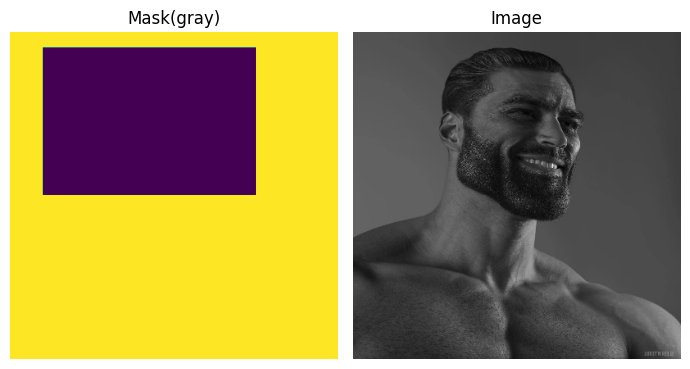

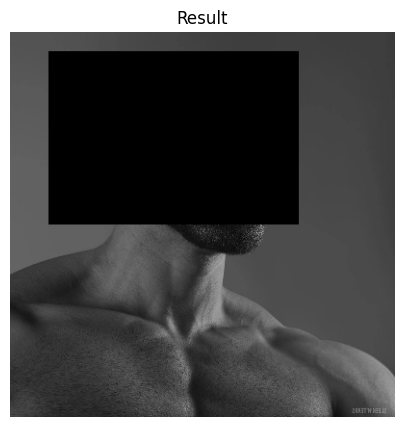

In [41]:
imgPath = 'imageSource/chad.jpg'
W = 400

mask = np.ones([W, W, 3], dtype = np.uint8) 
mask[20:200, 40:300] = 0

image = cv.imread(imgPath)  # Image file
image = cv.resize(image, (W, W))  # Resize to W x W
assert image is not None, "file could not be read, check with os.path.exists()"
mask = cv.cvtColor(mask, cv.COLOR_BGR2GRAY)


fig, ax = plt.subplots(1, 2, figsize=(7, 5))  # 1 row, 2 columns, and adjust the figure size as needed

# Display the mask
ax[0].imshow(mask)
ax[0].set_title('Mask(gray)')
ax[0].axis('off')  # Hide axes

# Display the image
ax[1].imshow(image)
ax[1].set_title('Image')
ax[1].axis('off')  # Hide axes

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


mask = cv.cvtColor(mask, cv.COLOR_GRAY2BGR)

#result = np.matmul(mask, image)
result_multi = image * mask

plt.figure(figsize=(5, 5))
plt.imshow(result_multi)
plt.title('Result')
plt.axis('off')  # Hide axes
plt.show()
